# Name : Shreya Sadashiva Kamath

# Git-Hub Username : shreyasa

# USC ID: 7553148882

# Number of Late Days: 2

In [132]:
# Import statements
import pandas as pd
import glob
import numpy as np
from sklearn import metrics
from io import StringIO
from sklearn.metrics import accuracy_score
import math
from tabulate import tabulate
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import numpy as np
import scipy.stats as st
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import RandomOverSampler
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import label_binarize
from itertools import cycle
# from scipy import interp 
from scipy.interpolate import interp1d
import warnings
warnings.filterwarnings('ignore')

In [15]:
dataPath = './Data/dataset/'

## 1. b) Creating Training and Tetsing Data

In [16]:
dir1 = ['bending1', 'bending2']
dir2 = ['cycling', 'lying', 'sitting', 'standing', 'walking']
train, test, allCsvs = [], [], []
curr=[]

for d in dir1:
    for filename in os.listdir(dataPath+d):
        curr.append(dataPath+d+"/"+filename)
        if filename[-6:-4] in ('t1', 't2'):
            test.append(dataPath+d+"/"+filename)
        else:
            train.append(dataPath+d+"/"+filename)
for d in dir2:
    for filename in os.listdir(dataPath+d):
        curr.append(dataPath+d+"/"+filename)
        if filename[-6:-4] in ('t1', 't2' , 't3'):
            test.append(dataPath+d+"/"+filename)
        else:
            train.append(dataPath+d+"/"+filename)
curr.sort()
allCsvs.append(curr)

In [20]:
test

['./dataset/bending1/dataset1.csv',
 './dataset/bending1/dataset2.csv',
 './dataset/bending2/dataset1.csv',
 './dataset/bending2/dataset2.csv',
 './dataset/cycling/dataset1.csv',
 './dataset/cycling/dataset2.csv',
 './dataset/cycling/dataset3.csv',
 './dataset/lying/dataset1.csv',
 './dataset/lying/dataset2.csv',
 './dataset/lying/dataset3.csv',
 './dataset/sitting/dataset1.csv',
 './dataset/sitting/dataset2.csv',
 './dataset/sitting/dataset3.csv',
 './dataset/standing/dataset1.csv',
 './dataset/standing/dataset2.csv',
 './dataset/standing/dataset3.csv',
 './dataset/walking/dataset1.csv',
 './dataset/walking/dataset2.csv',
 './dataset/walking/dataset3.csv']

In [22]:
train

['./dataset/bending1/dataset3.csv',
 './dataset/bending1/dataset4.csv',
 './dataset/bending1/dataset5.csv',
 './dataset/bending1/dataset6.csv',
 './dataset/bending1/dataset7.csv',
 './dataset/bending2/dataset3.csv',
 './dataset/bending2/dataset4.csv',
 './dataset/bending2/dataset5.csv',
 './dataset/bending2/dataset6.csv',
 './dataset/cycling/dataset10.csv',
 './dataset/cycling/dataset11.csv',
 './dataset/cycling/dataset12.csv',
 './dataset/cycling/dataset13.csv',
 './dataset/cycling/dataset14.csv',
 './dataset/cycling/dataset15.csv',
 './dataset/cycling/dataset4.csv',
 './dataset/cycling/dataset5.csv',
 './dataset/cycling/dataset6.csv',
 './dataset/cycling/dataset7.csv',
 './dataset/cycling/dataset8.csv',
 './dataset/cycling/dataset9.csv',
 './dataset/lying/dataset10.csv',
 './dataset/lying/dataset11.csv',
 './dataset/lying/dataset12.csv',
 './dataset/lying/dataset13.csv',
 './dataset/lying/dataset14.csv',
 './dataset/lying/dataset15.csv',
 './dataset/lying/dataset4.csv',
 './dataset/l

## c) Feature Extraction

### i) Research: Time-domain features used in time series classification: 

**Mean(Average)**: Represents the central tendency of the data.

**Minimum**: It is the minimum value of the dataset.

**Maximum**: Largest value in the time series.

**Median**: It is the middle value which divides the upper half and lower half of the dataset.

**Standard Deviation**: Measures the spread or dispersion of the data points from the mean.

**1st Quartile**: It the value under which 25% if the data points are found in a dataset.

**3rd Quartile**: It the value under which 75% if the data points are found in a dataset.

**Interquartile Range**: It is the range between 25% and 75%, where the middle 50% of the data points lie.

**Range**: It is the difference between the min and max values of a dataset.

**Variance**: It is mean squared difference between each data point and the centre of the distribution measured by the mean.

**skewness**: Measures the asymmetry of the data distribution.

**Kurtosis**: Measures the "tailedness" or the heaviness of the tails in the data distribution.

**Zero Crossing Rate**: Counts the number of times the signal changes sign.

**Entropy**: Quantifies the amount of information or disorder in the data.

**Autocorrelation**: Measures the correlation between a time series and a lagged version of itself.

**Cross-Correlation**: Measures the correlation between two different time series.

**Energy**: Represents the total energy contained in the time series.

### (ii) Time-domain features for the data 

In [29]:
cols = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']

featuresList = []

for csvs in allCsvs:
    for c in csvs:
        
        dataFrame = pd.read_csv(c, skiprows = 4, usecols = cols ,on_bad_lines='skip')
        desc = dataFrame.describe().transpose().iloc[:, [3,7,1,5,2,4,6]]
        stats = []
        
        for i in range(6):
            for j in range(7):
                k = desc.iloc[i, j]
                stats.append(k)
        
        featuresList.append(stats)

columnNames = ['min1','max1','mean1','median1','std_dev1','1st Quartile1','3rd Quartile1',
              'min2','max2','mean2','median2','std_dev2','1st Quartile2','3rd Quartile2',
              'min3','max3','mean3','median3','std_dev3','1st Quartile3','3rd Quartile3',
              'min4','max4','mean4','median4','std_dev4','1st Quartile4','3rd Quartile4',
              'min5','max5','mean5','median5','std_dev5','1st Quartile5','3rd Quartile5',
              'min6','max6','mean6','median6','std_dev6','1st Quartile6','3rd Quartile6']

feats = pd.DataFrame(featuresList, columns = columnNames)
pd.set_option('display.max_columns', None)

In [30]:
feats

min1   max1      mean1  median1  std_dev1  1st Quartile1  3rd Quartile1  \
0   37.25  45.00  40.624792   40.500  1.476967          39.25        42.0000   
1   38.00  45.67  42.812812   42.500  1.435550          42.00        43.6700   
2   35.00  47.40  43.954500   44.330  1.558835          43.00        45.0000   
3   33.00  47.75  42.179812   43.500  3.670666          39.15        45.0000   
4   33.00  45.75  41.678063   41.750  2.243490          41.33        42.7500   
..    ...    ...        ...      ...       ...            ...            ...   
83  20.75  46.25  34.763333   35.290  4.742208          31.67        38.2500   
84  21.50  51.00  34.935812   35.500  4.645944          32.00        38.0625   
85  18.33  47.67  34.333042   34.750  4.948770          31.25        38.0000   
86  18.33  45.75  34.599875   35.125  4.731790          31.50        38.0000   
87  15.50  43.67  34.225875   34.750  4.441798          31.25        37.2500   

    min2   max2     mean2  median2  std_dev2  1st Quartile2  3rd Quartile2  \
0    0.0   1.30  0.358604    0.430  0.322605           0.00         0.5000   
1    0.0   1.22  0.372437    0.470  0.289158           0.00         0.5000   
2    0.0   1.70  0.426250    0.470  0.338690           0.00         0.5000   
3    0.0   3.00  0.696042    0.500  0.630860           0.00         1.1200   
4    0.0   2.83  0.535979    0.500  0.405469           0.43         0.7100   
..   ...    ...       ...      ...       ...            ...            ...   
83   0.0  12.68  4.223792    3.900  2.278004           2.49         5.7225   
84   0.0  12.21  4.115750    3.845  2.335243           2.35         5.6250   
85   0.0  12.48  4.396958    3.900  2.568680           2.49         5.7450   
86   0.0  15.37  4.398833    4.025  2.538521           2.55         5.7675   
87   0.0  17.24  4.354500    3.900  2.518991           2.49         5.7650   

    min3   max3      mean3  median3  std_dev3  1st Quartile3  3rd Quartile3  \
0   4.00  29.50  19.040937   19.250  4.462952          16.00        23.2500   
1   2.00  29.50  20.096979   21.000  3.893737          19.00        22.2500   
2   6.50  29.75  22.122354   23.000  3.030943          19.75        24.0000   
3   8.50  30.00  22.183625   23.000  3.810469          20.50        24.3725   
4   3.00  28.25  19.006563   19.125  4.087107          16.50        22.0625   
..   ...    ...        ...      ...       ...            ...            ...   
83  5.00  23.75  15.239021   15.330  2.920829          13.50        17.2500   
84  6.50  23.33  15.524521   15.500  2.900248          13.33        17.6700   
85  7.67  23.33  15.562896   15.500  2.967741          13.67        17.5000   
86  5.50  24.00  15.173667   15.000  3.036746          13.00        17.3725   
87  7.67  23.00  15.606479   15.500  2.812274          13.75        17.5000   

    min4  max4     mean4  median4  std_dev4  1st Quartile4  3rd Quartile4  \
0    0.0  7.23  0.832542    0.500  0.965659         0.0000         1.1200   
1    0.0  5.76  0.876438    0.500  1.047259         0.0000         1.1450   
2    0.0  4.44  0.497312    0.430  0.550657         0.0000         0.8300   
3    0.0  5.15  0.989917    0.830  0.953730         0.4300         1.3000   
4    0.0  6.42  0.841875    0.500  0.928801         0.4300         1.1200   
..   ...   ...       ...      ...       ...            ...            ...   
83   0.0  9.20  3.207062    3.000  1.590472         2.0500         4.1950   
84   0.0  9.09  3.092792    2.870  1.503446         2.0575         3.8400   
85   0.0  9.01  3.198313    2.930  1.676271         2.0500         4.2450   
86   0.0  9.18  3.145500    3.015  1.591346         2.0375         4.1575   
87   0.0  9.20  3.365375    3.030  1.730792         2.1200         4.4400   

     min5   max5      mean5  median5  std_dev5  1st Quartile5  3rd Quartile5  \
0   27.25  38.25  34.311292    35.00  2.188449        33.0000          36.00   
1   27.67  38.50  33.024583    33.00  1.995255        32.0000          34

In [31]:
newValues = []
for i in range(1, 89):
    newValues.append(i)

feats.insert(loc = 0, column = 'Instance', value = newValues)

In [32]:
feats

Instance   min1   max1      mean1  median1  std_dev1  1st Quartile1  \
0          1  37.25  45.00  40.624792   40.500  1.476967          39.25   
1          2  38.00  45.67  42.812812   42.500  1.435550          42.00   
2          3  35.00  47.40  43.954500   44.330  1.558835          43.00   
3          4  33.00  47.75  42.179812   43.500  3.670666          39.15   
4          5  33.00  45.75  41.678063   41.750  2.243490          41.33   
..       ...    ...    ...        ...      ...       ...            ...   
83        84  20.75  46.25  34.763333   35.290  4.742208          31.67   
84        85  21.50  51.00  34.935812   35.500  4.645944          32.00   
85        86  18.33  47.67  34.333042   34.750  4.948770          31.25   
86        87  18.33  45.75  34.599875   35.125  4.731790          31.50   
87        88  15.50  43.67  34.225875   34.750  4.441798          31.25   

    3rd Quartile1  min2   max2     mean2  median2  std_dev2  1st Quartile2  \
0         42.0000   0.0   1.30  0.358604    0.430  0.322605           0.00   
1         43.6700   0.0   1.22  0.372437    0.470  0.289158           0.00   
2         45.0000   0.0   1.70  0.426250    0.470  0.338690           0.00   
3         45.0000   0.0   3.00  0.696042    0.500  0.630860           0.00   
4         42.7500   0.0   2.83  0.535979    0.500  0.405469           0.43   
..            ...   ...    ...       ...      ...       ...            ...   
83        38.2500   0.0  12.68  4.223792    3.900  2.278004           2.49   
84        38.0625   0.0  12.21  4.115750    3.845  2.335243           2.35   
85        38.0000   0.0  12.48  4.396958    3.900  2.568680           2.49   
86        38.0000   0.0  15.37  4.398833    4.025  2.538521           2.55   
87        37.2500   0.0  17.24  4.354500    3.900  2.518991           2.49   

    3rd Quartile2  min3   max3      mean3  median3  std_dev3  1st Quartile3  \
0          0.5000  4.00  29.50  19.040937   19.250  4.462952          16.00   
1          0.5000  2.00  29.50  20.096979   21.000  3.893737          19.00   
2          0.5000  6.50  29.75  22.122354   23.000  3.030943          19.75   
3          1.1200  8.50  30.00  22.183625   23.000  3.810469          20.50   
4          0.7100  3.00  28.25  19.006563   19.125  4.087107          16.50   
..            ...   ...    ...        ...      ...       ...            ...   
83         5.7225  5.00  23.75  15.239021   15.330  2.920829          13.50   
84         5.6250  6.50  23.33  15.524521   15.500  2.900248          13.33   
85         5.7450  7.67  23.33  15.562896   15.500  2.967741          13.67   
86         5.7675  5.50  24.00  15.173667   15.000  3.036746          13.00   
87         5.7650  7.67  23.00  15.606479   15.500  2.812274          13.75   

    3rd Quartile3  min4  max4     mean4  median4  std_dev4  1st Quartile4  \
0         23.2500   0.0  7.23  0.832542    0.500  0.965659         0.0000   
1         22.2500   0.0  5.76  0.876438    0.500  1.047259         0.0000   
2         24.0000   0.0  4.44  0.497312    0.430  0.550657         0.0000   
3         24.3725   0.0  5.15  0.989917    0.830  0.953730         0.4300   
4         22.0625   0.0  6.42  0.841875    0.500  0.928801         0.4300   
..            ...   ...   ...       ...      ...       ...            ...   
83        17.2500   0.0  9.20  3.207062    3.000  1.590472         2.0500   
84        17.6700   0.0  9.09  3.092792    2.870  1.503446         2.0575   
85        17.5000   0.0  9.01  3.198313    2.930  1.676271         2.0500   
86        17.3725   0.0  9.18  3.145500    3.015  1.591346         2.0375   
87        17.5000   0.0  9.20  3.365375    3.030  1.730792         2.1200   

    3rd Quartile4   min5   max5      mean5  median5  std_dev5  1st Quartile5  \
0          1.1200  27.25  38.25  34.311292    35.00  2.188449        33.0000   
1          1.1450  27.67  38.50  33.024583    33.00  1.995255        32.0000   
2          0.8300  29.00  38.50  35.588458    36.00 

### iii) Standard Deviation

In [33]:
def calculate_std_ci(dataset):
  std_dev_and_ci = {}

  for feature in dataset.columns:
    if feature not in ['folder','label']:
      data = dataset[feature].values
      # Calculate the standard deviation of the original data
      std_dev = np.std(data)

      # Perform bootstrap resampling to create confidence intervals
      resamples = bs.bootstrap(data, stat_func=bs_stats.std, num_iterations=10000, num_threads=1)

      # Extract the 90% confidence interval
      lower_bound = resamples.lower_bound
      upper_bound = resamples.upper_bound

      std_dev_and_ci[feature] = {
          'Standard Deviation': std_dev,
          '90% CI Lower Bound': lower_bound,
          '90% CI Upper Bound': upper_bound
      }

  table = [['Feature', 'Standard Deviation','90% CI Lower Bound','90% CI Upper Bound']]
  for feature, values in std_dev_and_ci.items():
    table.append([feature,values['Standard Deviation'], values['90% CI Lower Bound'], values['90% CI Upper Bound']])


  print(tabulate(table, headers='firstrow', tablefmt='grid'))

In [34]:
calculate_std_ci(time_series_dataset)

+---------------+----------------------+----------------------+----------------------+
| Feature       |   Standard Deviation |   90% CI Lower Bound |   90% CI Upper Bound |
+===============+======================+======================+======================+
| min1          |            11.8125   |             8.79864  |            15.7698   |
+---------------+----------------------+----------------------+----------------------+
| max1          |             4.26254  |             1.96562  |             6.90523  |
+---------------+----------------------+----------------------+----------------------+
| mean1         |             6.60898  |             5.23356  |             8.81333  |
+---------------+----------------------+----------------------+----------------------+
| median1       |             6.89904  |             5.41628  |             9.0986   |
+---------------+----------------------+----------------------+----------------------+
| std1          |             1.81943  |   

### iv) Three most important time-domain features

According to me the three most important time-domain features are:

**Mean**: Because it contains the score of each observation in the dataset and is good measure of the central tendency of the data when distribution is continuous.

**Median**: It provides us the central value of the dataset and gives us an idea of the central tendency of the dataset and is an important metric when we have outliers and skewed data in the dataset.

**Standard Deviation**: It gives us an ideal measure of dispersion of the data.


## 2. ISLR 3.7.4

a) Although, the true relationship between X and Y is linear the 'cubic' regression model might fit the training the training data really well as it has more flexibility and hence, the training RSS might be 'lower' for the cubic regression model compared to the linear one.

b) As we do not have enough information about the testing data, we cannot conclude anything perfectly. However, since the true relationship between X and Y is linear it will have lower RSS as compared to the cubic regression model as it will overfit the data and would result is higher RSS error.

(c) The train RSS for the cubic regression model might be lower than the train RSS for the linear model as the true relationship is non-linear, the cubic regression will fit better than the linear regression model.

(d) On Test data, it depends on the underlying relationship whether the linear regression would do better or the cubic regression. Hence, there is not enough information to a concrete answer. However, if the true relationship between X and Y is not very far from linear, the linear regression RSS would be lower. If the true relationship is very far from linear, the cubic regression RSS would be lower.

## 3. ISLR 3.7.3 - Extra Practice
## 3. ISLR 3.7.5 - Extra Practice

# Homework 4  

## 2. a) Binary Classification using Logistic Regression
## a. i) Scatter Plot Analysis: Distinguishing Bending from Other Activities Using Selected Features

In [35]:

lastList = []
count = 0
cols = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
for csv in train:
    
    dataFrame = pd.read_csv(csv, skiprows = 4, usecols =cols)
    activityFile = csv.split("/")
    stats = []
            
    desc = dataFrame.describe().transpose().iloc[:, [3, 7, 1, 5, 2, 4, 6]]
        
    for i in range(6):
        for j in range(7):
            y = desc.iloc[i, j]
            stats.append(y)
            
    if(activityFile[-2] in ("bending1", "bending2")):
        stats.append('bending')
    else:
        stats.append('non-bending')
    
    lastList.append(stats)


columnNames = ['minimum1','maximum1','mean1','median1','standard_dev1','first Quartile1','third Quartile1',
              'minimum2','maximum2','mean2','median2','standard_dev2','first Quartile2','third Quartile2',
              'minimum3','maximum3','mean3','median3','standard_dev3','first Quartile3','third Quartile3',
              'minimum4','maximum4','mean4','median4','standard_dev4','first Quartile4','third Quartile4',
              'minimum5','maximum5','mean5','median5','standard_dev5','first Quartile5','third Quartile5',
              'minimum6','maximum6','mean6','median6','standard_dev6','first Quartile6','third Quartile6', 'Activity']

names=['average_rss12_mean','average_rss12_median','average_rss12_std', 'var_rss12_mean','var_rss12_median','var_rss12_std','var_rss23_mean','var_rss23_median','var_rss23_std']

In [36]:
necessaryData = pd.DataFrame(lastList, columns = columnNames)

In [37]:
necessaryData

minimum1  maximum1      mean1  median1  standard_dev1  first Quartile1  \
0      35.00     47.40  43.954500   44.330       1.558835            43.00   
1      33.00     47.75  42.179812   43.500       3.670666            39.15   
2      33.00     45.75  41.678063   41.750       2.243490            41.33   
3      37.00     48.00  43.454958   43.250       1.386098            42.50   
4      36.25     48.00  43.969125   44.500       1.618364            43.31   
..       ...       ...        ...      ...            ...              ...   
64     20.75     46.25  34.763333   35.290       4.742208            31.67   
65     21.50     51.00  34.935812   35.500       4.645944            32.00   
66     18.33     47.67  34.333042   34.750       4.948770            31.25   
67     18.33     45.75  34.599875   35.125       4.731790            31.50   
68     15.50     43.67  34.225875   34.750       4.441798            31.25   

    third Quartile1  minimum2  maximum2     mean2  median2  standard_dev2  \
0           45.0000       0.0      1.70  0.426250    0.470       0.338690   
1           45.0000       0.0      3.00  0.696042    0.500       0.630860   
2           42.7500       0.0      2.83  0.535979    0.500       0.405469   
3           45.0000       0.0      1.58  0.378083    0.470       0.315566   
4           44.6700       0.0      1.50  0.413125    0.470       0.263111   
..              ...       ...       ...       ...      ...            ...   
64          38.2500       0.0     12.68  4.223792    3.900       2.278004   
65          38.0625       0.0     12.21  4.115750    3.845       2.335243   
66          38.0000       0.0     12.48  4.396958    3.900       2.568680   
67          38.0000       0.0     15.37  4.398833    4.025       2.538521   
68          37.2500       0.0     17.24  4.354500    3.900       2.518991   

    first Quartile2  third Quartile2  minimum3  maximum3      mean3  median3  \
0              0.00           0.5000      6.50     29.75  22.122354   23.000   
1              0.00           1.1200      8.50     30.00  22.183625   23.000   
2              0.43           0.7100      3.00     28.25  19.006563   19.125   
3              0.00           0.5000      5.75     27.00  15.793333   15.000   
4              0.43           0.5000      1.50     26.33  15.868021   16.250   
..              ...              ...       ...       ...        ...      ...   
64             2.49           5.7225      5.00     23.75  15.239021   15.330   
65             2.35           5.6250      6.50     23.33  15.524521   15.500   
66             2.49           5.7450      7.67     23.33  15.562896   15.500   
67             2.55           5.7675      5.50     24.00  15.173667   15.000   
68             2.49           5.7650      7.67     23.00  15.606479   15.500   

    standard_dev3  first Quartile3  third Quartile3  minimum4  maximum4  \
0        3.030943            19.75          24.0000       0.0      4.44   
1        3.810469            20.50          24.3725       0.0      5.15   
2        4.087107            16.50          22.0625       0.0      6.42   
3        3.847638            13.00          18.2700       0.0     10.03   
4        3.742420            14.25          18.0000       0.0      5.17   
..            ...              ...              ...       ...       ...   
64       2.920829            13.50          17.2500       0.0      9.20   
65       2.900248            13.33          17.6700       0.0      9.09   
66       2.967741            13.67          17.5000       0.0      9.01   
67       3.036746            13.00          17.3725       0.0      9.18   
68       2.812274            13.75          17.5000       0.0      9.20   

       mean4  median4  standard_dev4  first Quartile4  third Quartile4  \
0   0.497312    0.430       0.550657           0.0000           0.8300   
1   0.989917    0.830       0.953730           0.4300           1.3000   
2   0.841875    0.500       0.928801           0.4300     

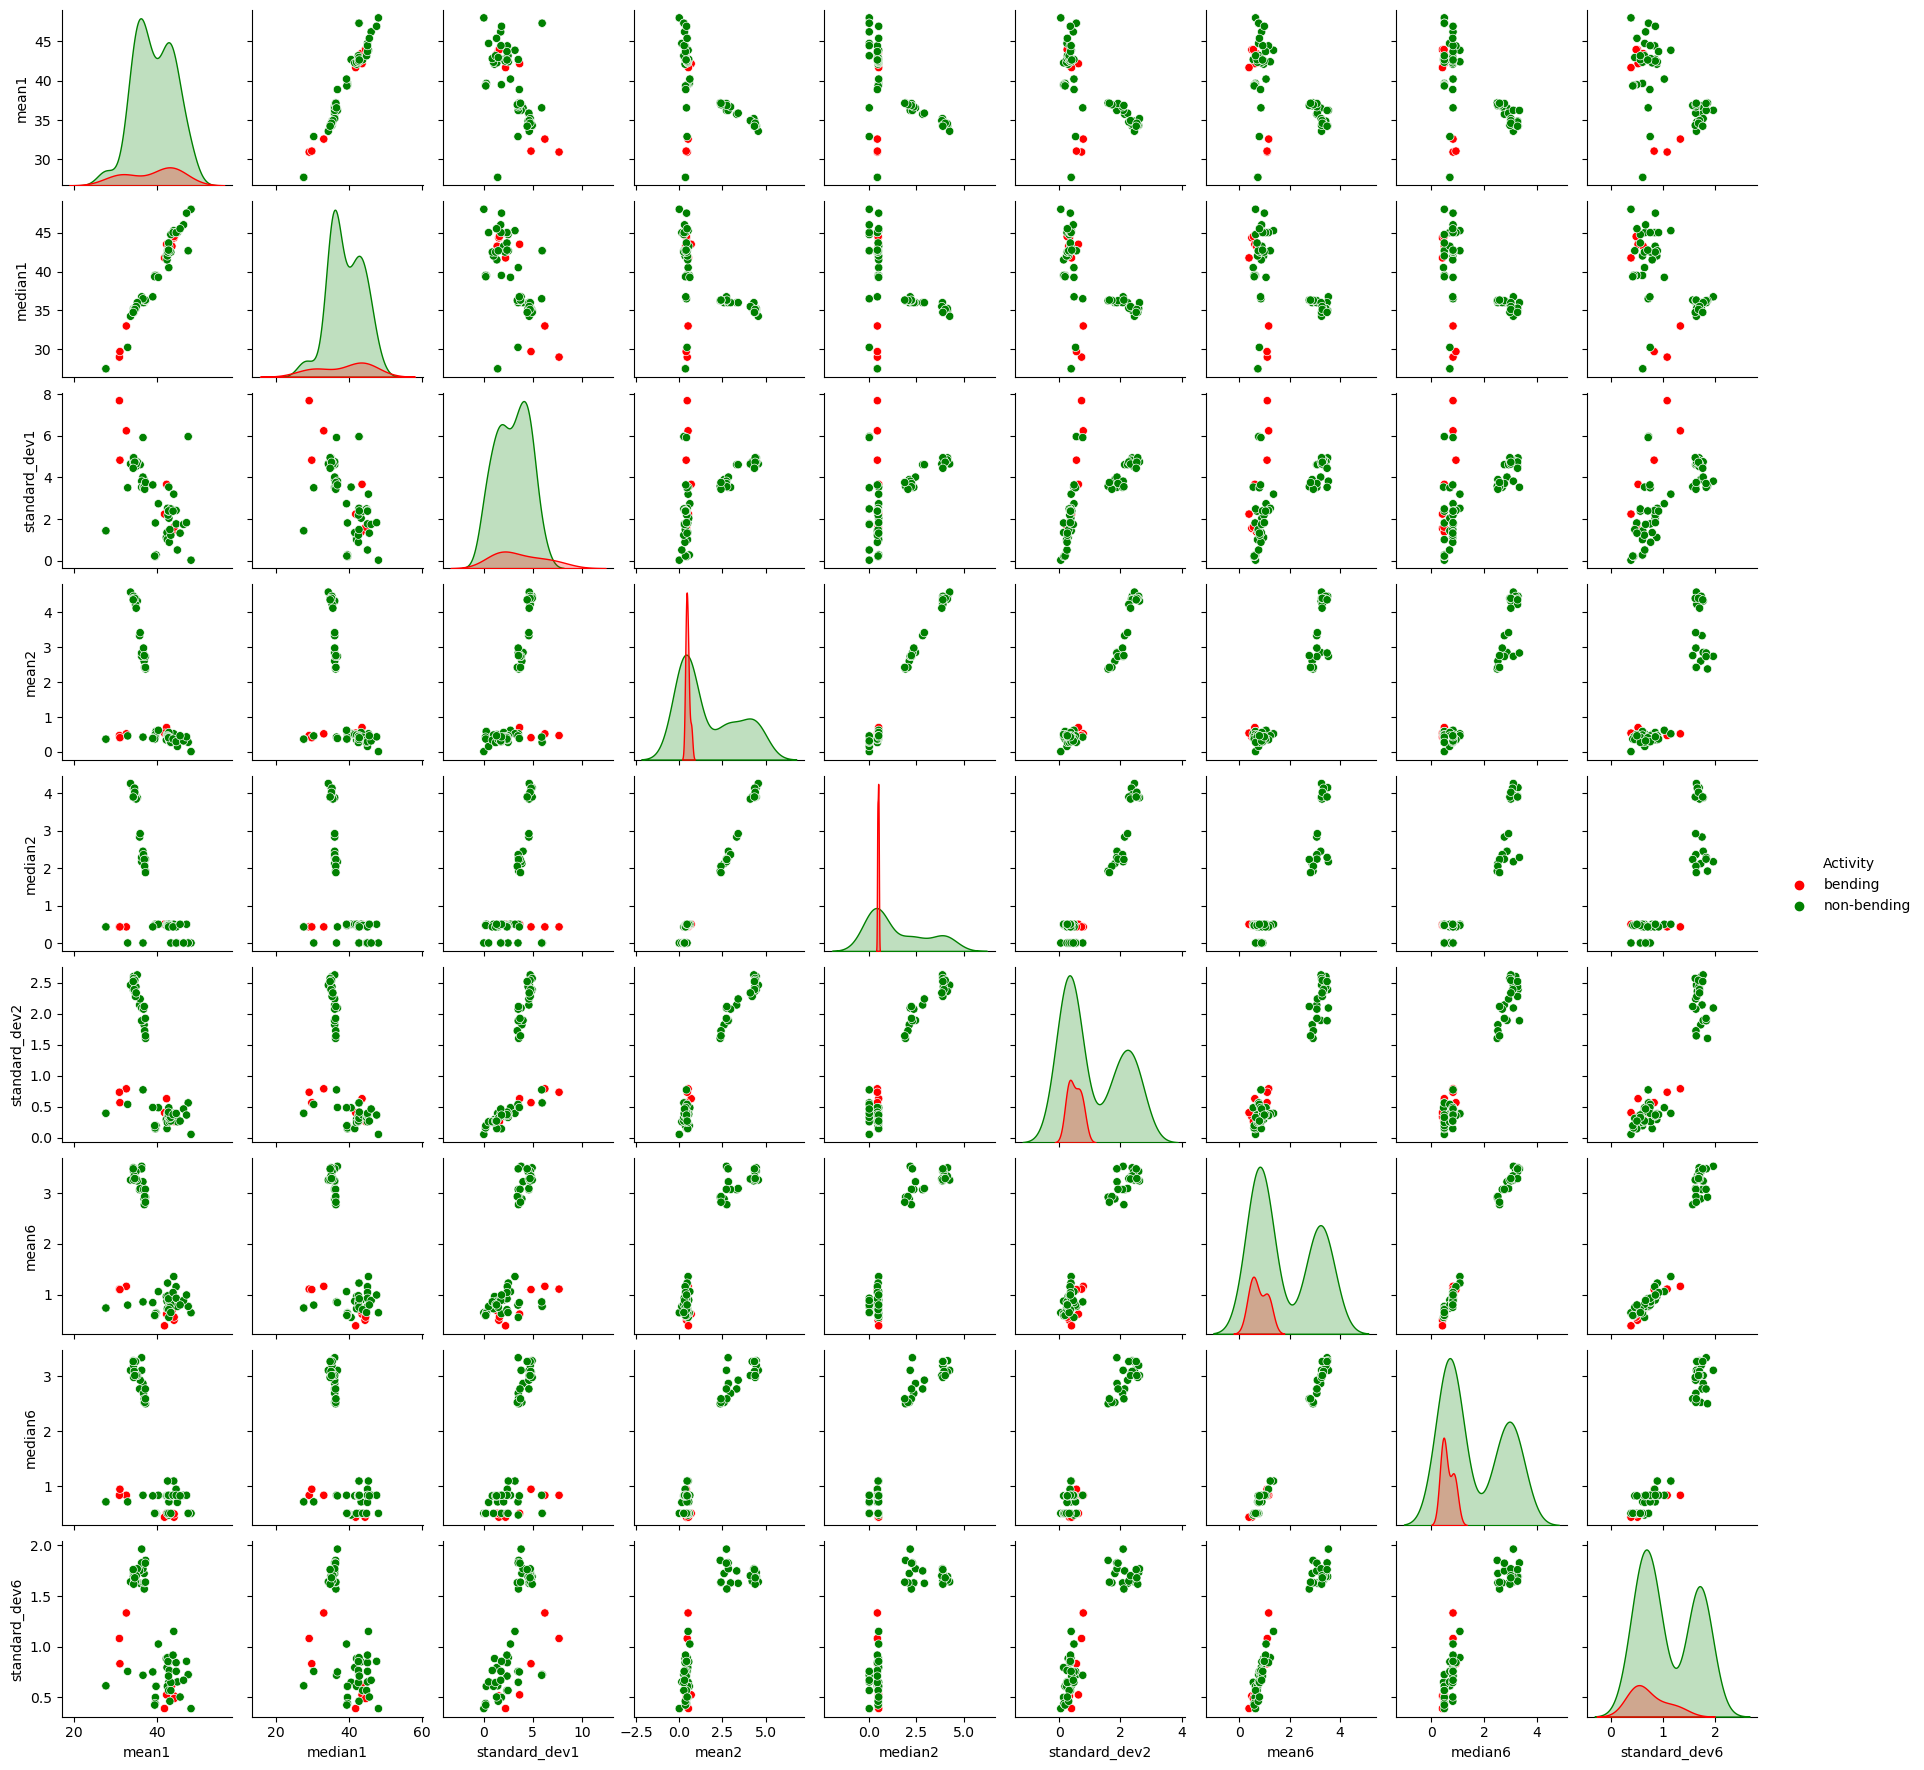

In [38]:
features = ['mean1', 'median1', 'standard_dev1','mean2', 'median2', 'standard_dev2','mean6', 'median6', 'standard_dev6','Activity']
l = []

selectedData = necessaryData.loc[:, features]

k = 0
d1 = {}
i = 0
while i < len(l) - 1:
    if k < len(names):
        d1[l[i]] = names[k]
        k += 1
    i += 1
    
custom_palette = ['red', 'green']
selectedData.rename(columns = d1, inplace = True)
sns.pairplot(selectedData, hue = 'Activity', height = 2 , palette=custom_palette)

## a. ii) Splitted Plots

In [39]:
lastData = []
count = 0
colNames = ['index', 'new_avg_rss12', 'new_var_rss12', 'new_avg_rss13', 'new_var_rss13',  'new_avg_rss23', 'new_var_rss23']

for csv in train:
    
    dataFrame = pd.read_csv(csv, skiprows = 4 , on_bad_lines='skip')
    df1 = dataFrame.iloc[:240, 1:]
    df2 = dataFrame.iloc[240:, 1:]
    df2.reset_index(inplace = True)
    
    df2.columns = colNames
    res = pd.concat([df1, df2], axis = 1)
    res = res.drop(['index'],axis=1)
    
    filename = csv.split("/")
        
    desc = res.describe().transpose().iloc[:, [1, 5, 2]]
    stats = []
            
    for i in range(12):
        for j in range(3):
            s = desc.iloc[i, j]
            stats.append(s)
        
    if(filename[-2] in ('bending1', 'bending2')):
        stats.append('bending') # class=1 for bending
    else:
        stats.append('non-bending') # class=0 for non-bending
        
    lastData.append(stats)

In [40]:
New_Columns = ['mean1', 'median1', 'standard_dev1', 'mean2', 'median2', 'standard_dev2', 'mean3', 'median3', 'standard_dev3', 
           'mean4', 'median4', 'standard_dev4', 'mean5', 'median5', 'standard_dev5', 'mean6', 'median6', 'standard_dev6',
           'mean7', 'median7', 'standard_dev7', 'mean8', 'median8', 'standard_dev8', 'mean9', 'median9', 'standard_dev9',
           'mean10', 'median10', 'standard_dev10', 'mean11', 'median11', 'standard_dev11', 'mean12', 'median12', 'standard_dev12',
           'Activity']

In [41]:
necessaryData = pd.DataFrame(lastData, columns = New_Columns)

In [42]:
necessaryData

mean1  median1  standard_dev1     mean2  median2  standard_dev2  \
0   44.057167   44.500       1.556971  0.381042    0.470       0.329540   
1   43.278875   45.000       3.473355  0.673292    0.485       0.634285   
2   41.621208   42.330       3.118644  0.623083    0.500       0.489595   
3   44.117042   45.000       1.359836  0.250042    0.000       0.314099   
4   43.486208   43.710       1.281976  0.378667    0.470       0.284434   
..        ...      ...            ...       ...      ...            ...   
64  34.966250   35.500       4.733014  4.207958    3.900       2.331940   
65  34.737042   35.500       4.276717  4.217333    4.030       2.337759   
66  33.886458   34.375       5.143776  4.332208    3.900       2.453111   
67  34.836458   35.750       4.869092  4.257750    3.770       2.512633   
68  34.329333   34.710       4.549837  4.315917    3.880       2.470266   

        mean3  median3  standard_dev3     mean4  median4  standard_dev4  \
0   23.096792   24.000       2.410625  0.493458    0.430       0.498420   
1   23.141250   23.750       3.123258  0.808042    0.710       0.769306   
2   19.081458   19.500       5.102939  1.115083    0.825       1.170828   
3   17.744167   18.000       4.010149  1.123000    0.830       1.141589   
4   16.397250   16.875       3.469237  0.662958    0.470       0.832544   
..        ...      ...            ...       ...      ...            ...   
64  15.125750   15.250       2.972166  3.270958    3.030       1.630072   
65  15.595917   15.500       2.830028  3.181292    2.955       1.516968   
66  15.158125   15.000       2.881089  3.249958    2.870       1.678657   
67  15.181958   15.000       2.981010  3.131417    3.040       1.530739   
68  15.674167   15.670       2.845277  3.366667    3.030       1.737917   

        mean5  median5  standard_dev5     mean6  median6  standard_dev6  \
0   36.293542   36.250       1.315724  0.598250    0.500       0.526656   
1   36.022125   36.000       1.650105  0.640958    0.765       0.554542   
2   30.078333   30.000       2.701406  0.419083    0.430       0.411200   
3   23.218708   23.500       2.967487  0.815417    0.710       0.718016   
4   22.325458   21.415       4.271610  0.524875    0.470       0.486847   
..        ...      ...            ...       ...      ...            ...   
64  16.430958   16.500       3.017264  3.146333    3.035       1.638218   
65  15.819292   16.250       3.231729  3.334125    3.000       1.737573   
66  15.899250   16.000       2.560395  3.248417    3.015       1.565557   
67  16.114250   16.000       2.933582  3.169625    2.870       1.647640   
68  16.274083   16.250       3.019042  3.381250    3.180       1.725690   

        mean7  median7  standard_dev7     mean8  median8  standard_dev8  \
0   43.851833   43.500       1.557168  0.471458    0.500       0.342346   
1   41.080750   42.000       3.537481  0.718792    0.500       0.627915   
2   41.734917   41.500       0.595920  0.448875    0.500       0.273050   
3   42.792875   42.670       1.058792  0.506125    0.500       0.260761   
4   44.452042   44.500       1.771251  0.447583    0.500       0.235493   
..        ...      ...            ...       ...      ...            ...   
64  34.560417   35.000       4.752584  4.239625    3.960       2.227526   
65  35.134583   35.585       4.989014  4.014167    3.670       2.333172   
66  34.779625   35.000       4.714249  4.461708    3.935       2.682846   
67  34.363292   35.000       4.588342  4.539917    4.075       2.561608   
68  34.122417   34.750       4.338107  4.393083    4.025       2.571376   

        mean9  median9  standard_dev9    mean10  median10  standard_dev10  \
0   21.147917   20.625       3.270099  0.501167      0.43        0.599386   
1   21.226000   22.000       4.183731  1.171792      0.87        1.079233   
2   18.931667   19.000       2.725349  0.568667      0.47        0.456292   
3   13.842500   14.250       2.438428  0.575708      0.43        0.730490   
4   15.338792   15.

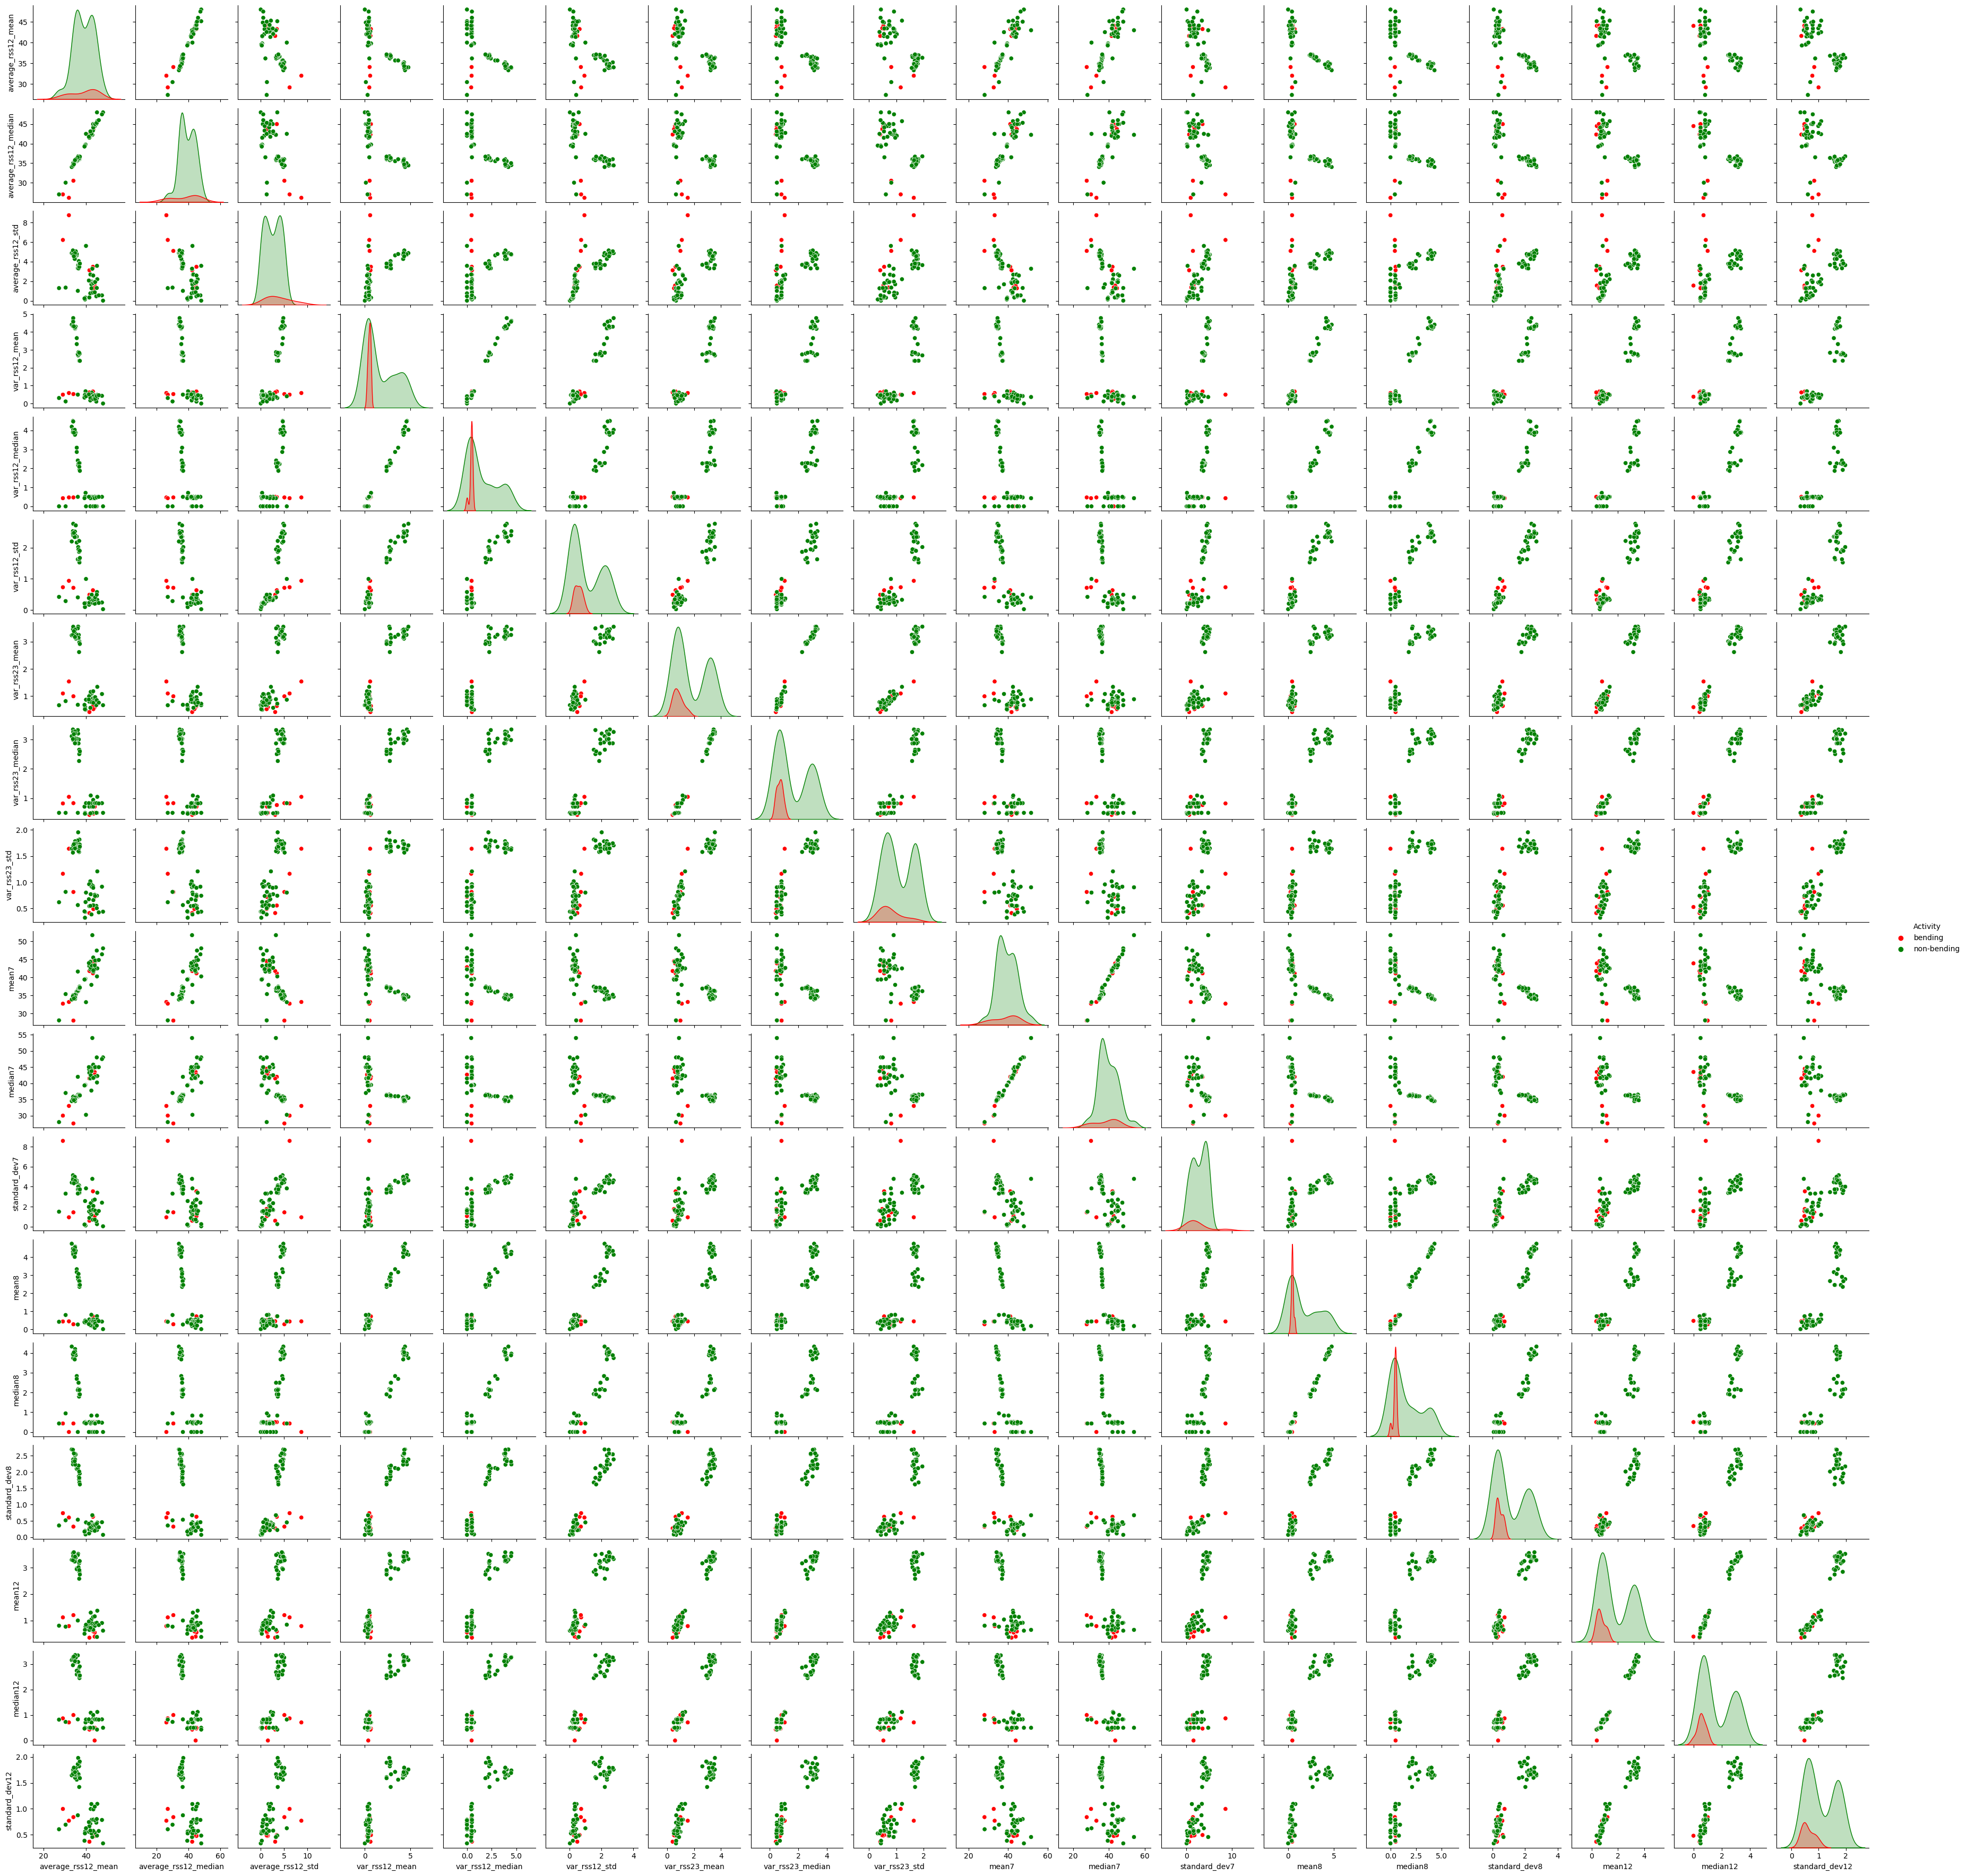

In [43]:
features = ['mean', 'median', 'standard_dev']
l = []
colNames = ['avg_rss12_first_mean', 'avg_rss12_first_median', 'avg_rss12_first_std', 'var_rss12_first_mean', 'var_rss12_first_median', 'var_rss12_first_std', 'var_rss23_first_mean', 'var_rss23_first_median', 'var_rss23_first_std', 'avg_rss12_second_mean', 'avg_rss12_second_median', 'avg_rss12_second_std', 'var_rss12_second_mean', 'var_rss12_second_median', 'var_rss12_second_std', 'var_rss23_second_mean', 'var_rss23_second_median', 'var_rss23_second_std']

p_values = [1, 2, 6, 7, 8, 12]
p_index = 0
while p_index < len(p_values):
    f_index = 0
    while f_index < len(features):
        l.append(features[f_index] + str(p_values[p_index]))
        f_index += 1
    p_index += 1
l.append('Activity')

selectedData = necessaryData.loc[:, l]

d1 = {}
k = 0
for i in range(len(l) - 1):
    while(k < len(names)):
        d1[l[i]] = names[k]
        k += 1
        break
custom_palette = ['red', 'green']
selectedData.rename(columns = d1, inplace = True)
sns.pairplot(selectedData, hue = 'Activity', height = 2,palette=custom_palette)

### From the above observation, we can say that there is no significant difference in both the plots, both looks very similar. A minute difference we can identify in the second plot is presence of extra data points

## a. iii)  

In [102]:
def breakData(filesList, n):
    
    finalColumns, finalData, l = [], [], []
    
    for csv in filesList:
        dataFrame = pd.read_csv(csv, skiprows = 4, on_bad_lines='skip')
        dataFrames = []
        split = 480 // n
        no = 0
        
        for frameNo in range(1, n + 1):
            colNames = ['avg_rss12_' + str(frameNo),'var_rss12_' + str(frameNo),'avg_rss13_' + str(frameNo),'var_rss13_' + str(frameNo),'avg_rss23_' + str(frameNo),'var_rss23_' + str(frameNo)]
            if frameNo == 1:
                dataFrame1 = dataFrame.iloc[:split, 1:]
            else:
                dataFrame1 = dataFrame.iloc[no: (frameNo * split), 1:]
                dataFrame1.reset_index(inplace = True, drop = True)
            dataFrame1.columns = colNames
            dataFrames.append(dataFrame1)
            no += split
        
        allFrames = pd.concat(dataFrames, axis = 1)
        filename = csv.split("/")
        
        desc = allFrames.describe().transpose().iloc[:, [1, 5, 2]]
        stats = []
            
        for i in range(6 * n):
            for j in range(3):
                s = desc.iloc[i, j]
                stats.append(s)
        
        if(filename[-2] in ('bending1', 'bending2')):
            stats.append(1) # 1 is the class for bending
        else:
            stats.append(0) # 0 is the class for non-bending
        
        finalData.append(stats)
    
    for f in range(1, (n * 6) + 1):
        finalColumns.append('mean' + str(f))
        finalColumns.append('median' + str(f))
        finalColumns.append('std_dev' + str(f))
    finalColumns.append('Activity')
    
    requiredData = pd.DataFrame(finalData, columns = finalColumns)
    return requiredData

In [105]:
pFeats, score1, score2, score3, score4, score5, l , meanscore = [], [], [], [], [], [], [], []

for i in range(1, 21):
    
    trainData = breakData(train, i)
    trainData.dropna(inplace=True)
    xTrain = trainData.iloc[:, 0 : -1]
    yTrain = trainData['Activity']
    
    logRegModel = LogisticRegression(penalty = None, max_iter = 5000)
    rfecv = RFECV(estimator = logRegModel, cv = StratifiedKFold(5), scoring = 'accuracy')
    rfecv.fit(xTrain, yTrain)
    
    l.append(i)
    pFeats.append(rfecv.n_features_)
    score1.append(np.max(rfecv.cv_results_["split0_test_score"]))
    score2.append(np.max(rfecv.cv_results_["split1_test_score"]))
    score3.append(np.max(rfecv.cv_results_["split2_test_score"]))
    score4.append(np.max(rfecv.cv_results_["split3_test_score"]))
    score5.append(np.max(rfecv.cv_results_["split4_test_score"]))
    meanscore.append(np.max(rfecv.cv_results_['mean_test_score']))
    print('Optimal number of features when l is', i, 'are', pFeats[-1])
    print('Maximum cross validation score for 1st fold is', score1[-1])
    print('Maximum cross validation score for 2nd fold is', score2[-1])
    print('Maximum cross validation score for 3rd fold is', score3[-1])
    print('Maximum cross validation score for 4th fold is', score4[-1])
    print('Maximum cross validation score for 5th fold is', score5[-1])
    print('Maximum average cross validation score is', meanscore[-1])
    print(" ")

Optimal number of features when l is 1 are 7
Maximum cross validation score for 1st fold is 1.0
Maximum cross validation score for 2nd fold is 1.0
Maximum cross validation score for 3rd fold is 0.8571428571428571
Maximum cross validation score for 4th fold is 1.0
Maximum cross validation score for 5th fold is 0.9230769230769231
Maximum average cross validation score is 0.956043956043956
 
Optimal number of features when l is 2 are 7
Maximum cross validation score for 1st fold is 1.0
Maximum cross validation score for 2nd fold is 0.9285714285714286
Maximum cross validation score for 3rd fold is 0.9285714285714286
Maximum cross validation score for 4th fold is 0.9230769230769231
Maximum cross validation score for 5th fold is 1.0
Maximum average cross validation score is 0.9417582417582417
 
Optimal number of features when l is 3 are 3
Maximum cross validation score for 1st fold is 1.0
Maximum cross validation score for 2nd fold is 1.0
Maximum cross validation score for 3rd fold is 0.9285

In [106]:
dfBestP = pd.DataFrame({'l': l, 'p features': pFeats, 'CV Score 1st Fold': score1, 'CV Score 2nd Fold': score2, 'CV Score 3rd Fold': score3, 'CV Score 4th Fold': score4, 'CV Score 5th Fold': score5, 'Average CV Score': meanscore})
dfBestP

l  p features  CV Score 1st Fold  CV Score 2nd Fold  CV Score 3rd Fold  \
0    1           7                1.0           1.000000           0.857143   
1    2           7                1.0           0.928571           0.928571   
2    3           3                1.0           1.000000           0.928571   
3    4           9                1.0           1.000000           0.928571   
4    5           2                1.0           1.000000           1.000000   
5    6           2                1.0           1.000000           1.000000   
6    7           1                1.0           1.000000           0.928571   
7    8           4                1.0           1.000000           0.928571   
8    9          10                1.0           1.000000           1.000000   
9   10          39                1.0           1.000000           0.928571   
10  11          29                1.0           1.000000           0.928571   
11  12          23                1.0           1.000000           0.928571   
12  13          23                1.0           1.000000           1.000000   
13  14          32                1.0           1.000000           0.928571   
14  15          60                1.0           1.000000           0.928571   
15  16          26                1.0           1.000000           0.928571   
16  17          95                1.0           1.000000           0.928571   
17  18         199                1.0           1.000000           0.928571   
18  19          76                1.0           1.000000           0.928571   
19  20         177                1.0           1.000000           0.928571   

    CV Score 4th Fold  CV Score 5th Fold  Average CV Score  
0            1.000000           0.923077          0.956044  
1            0.923077           1.000000          0.941758  
2            0.923077           1.000000          0.970330  
3            1.000000           1.000000          0.942857  
4            1.000000           1.000000          0.985714  
5            1.000000           1.000000          0.985714  
6            1.000000           1.000000          0.970330  
7            1.000000           1.000000          0.971429  
8            1.000000           1.000000          0.971429  
9            1.000000           1.000000          0.985714  
10           1.000000           1.000000          0.985714  
11           1.000000           1.000000          0.971429  
12           1.000000           1.000000          0.985714  
13           1.000000           1.000000          0.970330  
14           1.000000           1.000000          0.985714  
15           1.000000           1.000000          0.971429  
16           1.000000           1.000000          0.985714  
17           1.000000           1.000000          0.985714  
18           1.000000           1.000000          0.971429  
19           1.000000           1.000000          0.970330

### Observation:
#### 1. Cross-validation's aim is to gauge the predictive error on unseen data. It's crucial not to withhold information about the different predictors present in our dataset from our algorithm. Therefore, integrating Recursive Feature Elimination with Cross-Validation is the appropriate approach.
#### 2.Conversely, applying Recursive Feature Elimination prior to conducting Cross-Validation is not the correct method.

## a. iv)

In [47]:
trainData = breakData(train, 1)
trainData.dropna(inplace=True)
xTrain = trainData.iloc[:, 0 : -1]
yTrain = trainData['Activity']
logRegModel = LogisticRegression(max_iter = 5000)
rfe = RFE(logRegModel, n_features_to_select = 8)
rfe.fit(xTrain, yTrain)
yPredicted = rfe.predict(xTrain)
confMatrix = confusion_matrix(yTrain, yPredicted)
print('The Confusion Matrix is:\n', confMatrix)
columns = list(xTrain.columns[rfe.support_])

The Confusion Matrix is:
 [[60  0]
 [ 0  8]]


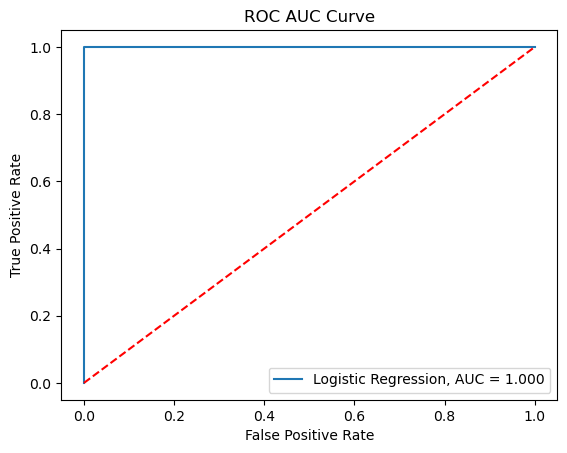

In [48]:
rocAucScore = roc_auc_score(yTrain, yPredicted)
falsePos, truePos, thresholds = roc_curve(yTrain, rfe.predict_proba(xTrain)[:, 1])
plt.plot(falsePos, truePos, label = 'Logistic Regression, AUC = %0.3f' %rocAucScore)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend()

In [49]:
trainData = trainData.loc[:, columns]
logit = sm.Logit(yTrain, trainData)
logitModel = logit.fit()
logitModel.summary()

         Current function value: 0.000015
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Activity   No. Observations:                   68
Model:                          Logit   Df Residuals:                       60
Method:                           MLE   Df Model:                            7
Date:                Sun, 03 Mar 2024   Pseudo R-squ.:                   1.000
Time:                        16:28:55   Log-Likelihood:            -0.00099658
converged:                      False   LL-Null:                       -24.630
Covariance Type:            nonrobust   LLR p-value:                 2.019e-08
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
mean1           -13.8941   1700.509     -0.008      0.993   -3346.831    3319.043
mean2            33.3533   5313.705      0.006      0.995   -1.04e+04    1.04e+04
mean3            60.5367   8579.728      0.007      0.994   -1.68e+04    1.69e+04
median3         -50.3782   5923.873     -0.009      0.993   -1.17e+04    1.16e+04
median4         -78.8147   1.22e+04     -0.006      0.995    -2.4e+04    2.39e+04
mean5            23.2881   2341.435      0.010      0.992   -4565.841    4612.417
standard_dev5    -5.1531   2441.816     -0.002      0.998   -4791.025    4780.719
median6          10.1990   9343.627      0.001      0.999   -1.83e+04    1.83e+04
=================================================================================

Possibly complete quasi-separation: A fraction 0.99 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## a. v) 

In [50]:
testData = breakData(test, 1)
testData.dropna(inplace=True)
xTest = testData.iloc[:, 0 : -1]
yTest = testData['Activity']
logRegModel = LogisticRegression(max_iter = 5000)
rfe = RFE(logRegModel, n_features_to_select = 8)
rfe.fit(xTest, yTest)
yPredicted = rfe.predict(xTest)
confMatrix = confusion_matrix(yTest, yPredicted)
print('The Confusion Matrix is:\n', confMatrix)
columns = list(xTrain.columns[rfe.support_])

The Confusion Matrix is:
 [[15  0]
 [ 0  4]]


Accuracy: 1.0
Max Cross Validation Score is:  1.0


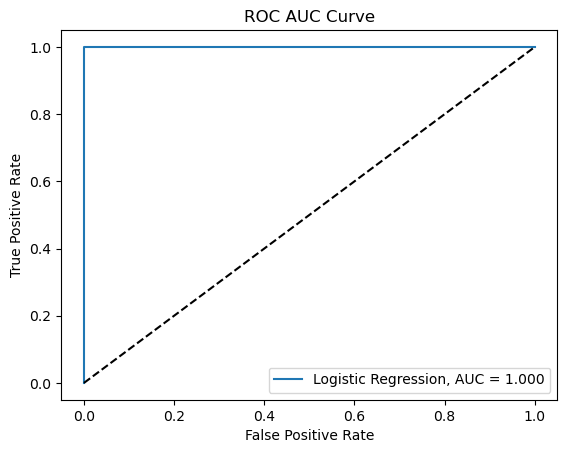

In [51]:
rocAucScore = roc_auc_score(yTest, yPredicted)
falsePos, truePos, thresholds = roc_curve(yTest, rfe.predict_proba(xTest)[:, 1])
plt.plot(falsePos, truePos, label = 'Logistic Regression, AUC = %0.3f' %rocAucScore)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.plot([0, 1], [0, 1], 'r--',color='black')
plt.legend()

accuracy = accuracy_score(yTest, yPredicted)
print("Accuracy:", accuracy)

print("Max Cross Validation Score is: ", rfe.score(xTest, yTest))

### From the above observation we can say that accuracy and cross validation are almost same

## a. vi) 

### Yes, the classes are well-separated because AUC of 1.0 indicates oerfect discrimination between clsses,Confusion Matrix shows perfect classification on training set without any errors, F1 score is high which shows clear separation between classes, the p-values we have obtained for all the parameters are also very close to 1 and also when the maximum lilelihood estimation failed to converge.

## a. vii)

In [52]:
xSampled, ySampled = RandomOverSampler(random_state = 36).fit_resample(xTrain, yTrain)
logRegModel = LogisticRegression(solver = 'liblinear')
rfe = RFE(logRegModel, n_features_to_select = 8)
rfe.fit(xSampled, ySampled)
yPredicted = rfe.predict(xSampled)
confMatrix = confusion_matrix(ySampled, yPredicted)
print('The Confusion Matrix is:\n', confMatrix)

The Confusion Matrix is:
 [[59  1]
 [ 0 60]]


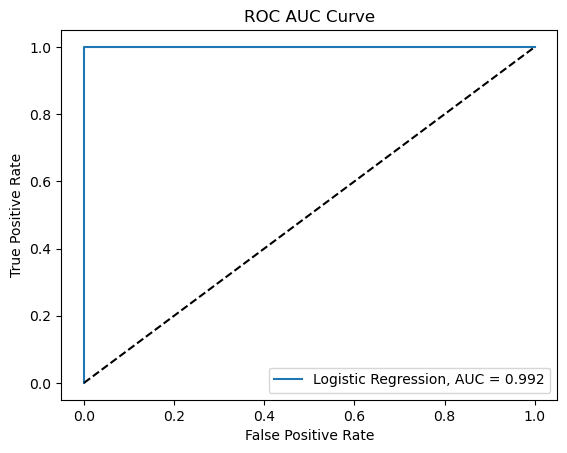

In [53]:
rocAucScore = roc_auc_score(ySampled, yPredicted)
falsePos, truePos, thresholds = roc_curve(ySampled, rfe.predict_proba(xSampled)[:, 1])
plt.plot(falsePos, truePos, label = 'Logistic Regression, AUC = %0.3f' %rocAucScore)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.plot([0, 1], [0, 1], 'r--',color='black')
plt.legend()

# 2. b) Binary Classification using L1-penalized logistic regression

## b. i)

In [122]:
pFeats, scores = [], []
bestP, bestScore, bestL = None, 0, None

tolerance = 0.01 
for i in range(1, 21):
    
    trainData = breakData(train, i)
    trainData.dropna(inplace=True)
    xTrain = trainData.iloc[:, 0 : -1]
    yTrain = trainData['Activity']
    
    stdScaler = StandardScaler()
    transXTrain = stdScaler.fit_transform(xTrain)
    
    param = {'C': np.linspace(1, 10, 10)}
    logRegModel = LogisticRegression()
    cvModel = GridSearchCV(logRegModel, param, cv = 5)
    cvModel.fit(transXTrain, yTrain)
    
    select = SelectFromModel(LogisticRegression(C = (1 / cvModel.best_params_.get('C')), penalty='l1', solver='liblinear'))
    select.fit(transXTrain, yTrain)
    selectedFeatures = xTrain.columns[(select.get_support())]
    print('Value of l: ', i)
    print('Value of C: ', cvModel.best_params_.get('C'))
    pFeats.append(len(selectedFeatures))
    scores.append(cvModel.best_score_)
    print('Features Selected are: ', pFeats[-1])
    print('Score:', scores[-1])
    print(' ')
    
#     if scores[-1] > bestScore:
#         bestScore = scores[-1]
#         bestP = pFeats[-1]
#         bestL = i 
    if scores[-1] > bestScore:
        bestScore = scores[-1]
        bestP = pFeats[-1]
        bestL = i
    elif scores[-1] >= (bestScore - tolerance) and pFeats[-1] > bestP:
        # If the current model's score is within the tolerance of the bestScore
        # and has more features, consider updating the best model
        bestP = pFeats[-1]
        bestL = i

Value of l:  1
Value of C:  1.0
Features Selected are:  7
Score: 0.9417582417582417
 
Value of l:  2
Value of C:  1.0
Features Selected are:  5
Score: 0.9406593406593406
 
Value of l:  3
Value of C:  1.0
Features Selected are:  4
Score: 0.9120879120879122
 
Value of l:  4
Value of C:  2.0
Features Selected are:  5
Score: 0.9549450549450551
 
Value of l:  5
Value of C:  1.0
Features Selected are:  8
Score: 0.9263736263736264
 
Value of l:  6
Value of C:  1.0
Features Selected are:  8
Score: 0.9263736263736264
 
Value of l:  7
Value of C:  1.0
Features Selected are:  5
Score: 0.9263736263736264
 
Value of l:  8
Value of C:  1.0
Features Selected are:  9
Score: 0.9263736263736264
 
Value of l:  9
Value of C:  1.0
Features Selected are:  9
Score: 0.9263736263736264
 
Value of l:  10
Value of C:  1.0
Features Selected are:  9
Score: 0.9120879120879122
 
Value of l:  11
Value of C:  2.0
Features Selected are:  9
Score: 0.9120879120879122
 
Value of l:  12
Value of C:  5.0
Features Selected a

In [123]:
print('The best value of l is', bestL, 'and p is', bestP, 'and the accuracy is', bestScore)

The best value of l is 4 and p is 5 and the accuracy is 0.9549450549450551


## b. ii) 

### Both the approaches give more or less same number of features. However, the Recursive feature elimination process is difficult as compared to L1-penalized method. The L1- penalized cross validation took lesser time as compared to RFECV. According to me L1-penalized performed better on the time-series dataset.

# c)  Multi-class Classification

## c. i)

In [124]:
def breakTimeSeriesMulticlass(filesList, n):
    
    finalColumns, finalData, l = [], [], []
    
    for csv in filesList:
        dataFrame = pd.read_csv(csv, skiprows = 4, on_bad_lines='skip')
        dataFrames = []
        split = 480 // n
        no = 0
        
        for frameNo in range(1, n + 1):
            colNames = ['avg_rss12_' + str(frameNo),'var_rss12_' + str(frameNo),'avg_rss13_' + str(frameNo),'var_rss13_' + str(frameNo),'avg_rss23_' + str(frameNo),'var_rss23_' + str(frameNo)]
            if frameNo == 1:
                dataFrame1 = dataFrame.iloc[:split, 1:]
            else:
                dataFrame1 = dataFrame.iloc[no: (frameNo * split), 1:]
                dataFrame1.reset_index(inplace = True, drop = True)
            dataFrame1.columns = colNames
            dataFrames.append(dataFrame1)
            no += split
        
        allFrames = pd.concat(dataFrames, axis = 1)
        filename = csv.split("/")
        
        desc = allFrames.describe().transpose().iloc[:, [1, 5, 2]]
        stats = []
            
        for i in range(6 * n):
            for j in range(3):
                s = desc.iloc[i, j]
                stats.append(s)
        
        stats.append(filename[-2])
        finalData.append(stats)
    
    for f in range(1, (n * 6) + 1):
        finalColumns.append('mean' + str(f))
        finalColumns.append('median' + str(f))
        finalColumns.append('std_dev' + str(f))
    finalColumns.append('Activity')
    
    requiredData = pd.DataFrame(finalData, columns = finalColumns)
    requiredData['Activity'] = requiredData['Activity'].map({'bending1': 1,'bending2': 2,'cycling': 3, 'lying': 4,'sitting': 5, 'standing': 6, 'walking': 7})
    return requiredData

In [125]:
pFeats, scores, l = [], [], []
bestP, bestScore, bestL, selectedFeats = None, 0, None, None

for i in range(1, 21):
    trainData = breakTimeSeriesMulticlass(train, i)
    trainData.dropna(inplace=True)
    xTrain = trainData.iloc[:, 0 : -1]
    yTrain = trainData['Activity']
    
    stdScaler = StandardScaler()
    transXTrain = stdScaler.fit_transform(xTrain)
    
    param = {'C': np.linspace(1, 10, 10)}
    logRegModel = LogisticRegression(max_iter = 5000)
    cvModel = GridSearchCV(logRegModel, param, cv = 5)
    cvModel.fit(transXTrain, yTrain)
    
    select = SelectFromModel(LogisticRegression(C = (1 / cvModel.best_params_.get('C')), penalty='l1', solver='liblinear'))
    select.fit(transXTrain, yTrain)
    selectedFeatures = xTrain.columns[(select.get_support())]
    print('Value of l: ', i)
    print('Value of C: ', cvModel.best_params_.get('C'))
    pFeats.append(len(selectedFeatures))
    scores.append(cvModel.best_score_)
    print('Features Selected are: ', pFeats[-1])
    print('Score:', scores[-1])
    print('')
    
    if scores[-1] > bestScore:
        bestScore = scores[-1]
        bestP = pFeats[-1]
        bestL = i
        selectedFeats = selectedFeatures

Value of l:  1
Value of C:  2.0
Features Selected are:  12
Score: 0.9252747252747253

Value of l:  2
Value of C:  2.0
Features Selected are:  19
Score: 0.9263736263736263

Value of l:  3
Value of C:  5.0
Features Selected are:  24
Score: 0.9120879120879122

Value of l:  4
Value of C:  1.0
Features Selected are:  38
Score: 0.8538461538461538

Value of l:  5
Value of C:  1.0
Features Selected are:  42
Score: 0.8681318681318683

Value of l:  6
Value of C:  4.0
Features Selected are:  38
Score: 0.8824175824175825

Value of l:  7
Value of C:  2.0
Features Selected are:  48
Score: 0.8252747252747252

Value of l:  8
Value of C:  2.0
Features Selected are:  49
Score: 0.8692307692307694

Value of l:  9
Value of C:  1.0
Features Selected are:  61
Score: 0.8395604395604396

Value of l:  10
Value of C:  1.0
Features Selected are:  61
Score: 0.8395604395604395

Value of l:  11
Value of C:  1.0
Features Selected are:  63
Score: 0.8098901098901099

Value of l:  12
Value of C:  1.0
Features Selected a

In [126]:
print('The best value of l is', bestL, 'and p is', bestP, 'and the accuracy is', bestScore)


The best value of l is 2 and p is 19 and the accuracy is 0.9263736263736263


In [127]:
print('The features that are selected by the model are:', selectedFeats)

The features that are selected by the model are: Index(['median1', 'std_dev1', 'median2', 'median3', 'std_dev3', 'std_dev4',
       'mean5', 'median5', 'std_dev5', 'std_dev6', 'median7', 'median8',
       'median9', 'std_dev9', 'std_dev10', 'mean11', 'median11', 'std_dev11',
       'std_dev12'],
      dtype='object')


In [129]:
# Step 1: Regenerate your training data with the specified break length (l = 1 in this case)
trainData = breakTimeSeriesMulticlass(train, 1)

# Ensure no rows with missing values are included
trainData.dropna(inplace=True)

# Select features (excluding the target variable) for training
xTrain = trainData.iloc[:, 0 : -1]

# Make sure 'selectedFeats' contains only features that exist in 'xTrain'
# This can be done by intersecting 'selectedFeats' with 'xTrain.columns'
# This ensures that only the columns present in both 'selectedFeats' and 'xTrain' are selected
selectedFeats = [feat for feat in selectedFeats if feat in xTrain.columns]

# Now, select only the features in 'selectedFeats' from 'xTrain'
xTrain = xTrain.loc[:, selectedFeats]

# The target variable 'Activity' is what we're trying to predict
yTrain = trainData['Activity']

# Initialize the Logistic Regression model
logRegModel = LogisticRegression()

# Fit the model with the selected features and target variable
logRegModel.fit(xTrain, yTrain)


LogisticRegression()

In [130]:
trainAccuracy = logRegModel.score(xTrain, yTrain)
print('The model accuracy for the training data is', trainAccuracy * 100, '%')

The model accuracy for the training data is 98.52941176470588 %


In [134]:
testData = breakTimeSeriesMulticlass(test, 1)
xTest = testData.iloc[:, 0 : -1]
xTest = xTest.loc[:, selectedFeats]
yTest = testData['Activity']

testAccuracy = logRegModel.score(xTest, yTest)
print('The model accuracy for the training data is', testAccuracy * 100, '%')
print('The test error rate of the model is', (1 - testAccuracy) * 100, "%")

yPredicted = logRegModel.predict(xTest)
yScores = logRegModel.decision_function(xTest)
confMatrix = metrics.confusion_matrix(yTest, yPredicted)
print('\nThe confusion matrix is:\n')
print(confMatrix)

The model accuracy for the training data is 78.94736842105263 %
The test error rate of the model is 21.052631578947366 %

The confusion matrix is:

[[2 0 0 0 0 0 0]
 [1 0 0 0 1 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 1 0]
 [0 0 0 1 0 2 0]
 [0 0 0 0 0 0 3]]


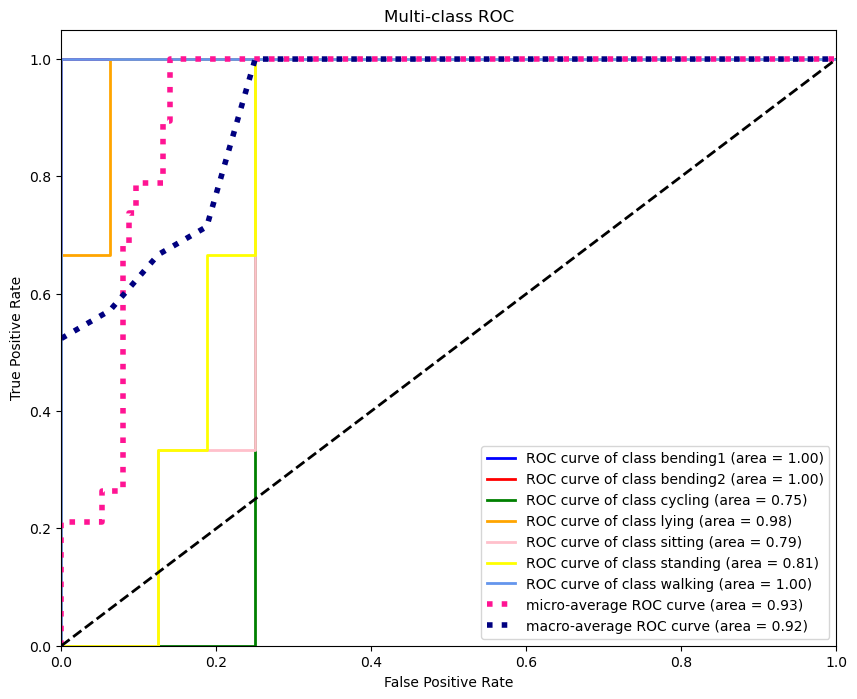

In [136]:
# Assuming yTrain, yTest are already defined and label_binarized
# yScores needs to be defined. It's the output of a classifier's decision_function or predict_proba method for yTest

classesN = yTrain.shape[1]
falsePosRate, truePosRate, rocAuc = dict(), dict(), dict()

for i in range(classesN):
    falsePosRate[i], truePosRate[i], _ = roc_curve(yTest[:, i], yScores[:, i])
    rocAuc[i] = auc(falsePosRate[i], truePosRate[i])

# Compute micro-average ROC curve and ROC area
falsePosRate["micro"], truePosRate["micro"], _ = roc_curve(yTest.ravel(), yScores.ravel())
rocAuc["micro"] = auc(falsePosRate["micro"], truePosRate["micro"])

# Aggregate all false positive rates
FPR = np.unique(np.concatenate([falsePosRate[i] for i in range(classesN)]))

# Then interpolate all ROC curves at these points
meanTruePosRate = np.zeros_like(FPR)
for i in range(classesN):
    meanTruePosRate += np.interp(FPR, falsePosRate[i], truePosRate[i])

# Finally, average it and compute AUC
meanTruePosRate /= classesN

falsePosRate["macro"] = FPR
truePosRate["macro"] = meanTruePosRate
rocAuc["macro"] = auc(falsePosRate["macro"], truePosRate["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'red', 'green', 'orange', 'pink', 'yellow', 'cornflowerblue'])
classes = ['bending1', 'bending2', 'cycling', 'lying', 'sitting', 'standing', 'walking']

# Plot ROC curve for each class and the micro- and macro-averages
for i, color in zip(range(classesN), colors):
    plt.plot(falsePosRate[i], truePosRate[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(classes[i], rocAuc[i]))

plt.plot(falsePosRate["micro"], truePosRate["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(rocAuc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(falsePosRate["macro"], truePosRate["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'.format(rocAuc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC')
plt.legend(loc="lower right")
plt.show()


## c. ii) 

In [82]:
bestGaus, bestL = 0, None
for i in range(1, 21):
    
    trainData = breakTimeSeriesMulticlass(train, i)
    trainData.dropna(inplace=True)
    xTrain = trainData.iloc[:, 0 : -1]
    yTrain = trainData['Activity']
    
    testData = breakTimeSeriesMulticlass(test, i)
    xTest = testData.iloc[:, 0 : -1]
    yTest = testData['Activity']
    
    gaussianNB = GaussianNB()
    gausModel = gaussianNB.fit(xTrain, yTrain)
    score = gausModel.score(xTest, yTest)
    print(i, score)
    if score > bestGaus:
        bestGaus = score
        bestL = i

print('\nThe best split is when value of l is', bestL, 'and the best testing score is', bestGaus)

1 0.7894736842105263
2 0.6842105263157895
3 0.7368421052631579
4 0.7368421052631579
5 0.7368421052631579
6 0.7894736842105263
7 0.6842105263157895
8 0.7368421052631579
9 0.6842105263157895
10 0.6842105263157895
11 0.6842105263157895
12 0.631578947368421
13 0.6842105263157895
14 0.7368421052631579
15 0.7368421052631579
16 0.7368421052631579
17 0.631578947368421
18 0.6842105263157895
19 0.6842105263157895
20 0.7368421052631579

The best split is when value of l is 1 and the best testing score is 0.7894736842105263


In [83]:
bestMulti, bestL = 0, None
for i in range(1, 21):
    
    trainData = breakTimeSeriesMulticlass(train, i)
    trainData.dropna(inplace=True)
    xTrain = trainData.iloc[:, 0 : -1]
    yTrain = trainData['Activity']
    
    testData = breakTimeSeriesMulticlass(test, i)
    xTest = testData.iloc[:, 0 : -1]
    yTest = testData['Activity']
    
    multinomialNB = MultinomialNB()
    multiModel = multinomialNB.fit(xTrain, yTrain)
    score = multiModel.score(xTest, yTest)
    print(i, score)
    if score > bestMulti:
        bestMulti = score
        bestL = i

print('\nThe best split is when value of l is', bestL, 'and the best testing score is', bestMulti)

1 0.8421052631578947
2 0.8421052631578947
3 0.8947368421052632
4 0.8421052631578947
5 0.8421052631578947
6 0.8421052631578947
7 0.8421052631578947
8 0.8947368421052632
9 0.7894736842105263
10 0.8421052631578947
11 0.8947368421052632
12 0.8947368421052632
13 0.8947368421052632
14 0.8421052631578947
15 0.8947368421052632
16 0.8947368421052632
17 0.8947368421052632
18 0.8947368421052632
19 0.8947368421052632
20 0.8947368421052632

The best split is when value of l is 3 and the best testing score is 0.8947368421052632


## c. iii)

## The testing accuracy of Multinomial Naive Bayes is 0.8947

## The testing accuracy of Gaussian Naive Bayes is 0.7894

## The testing accuracy of Multiclass Logistic Regression is also around 0.8947. Hence, Multiclass logistic regression and Multinomial NB perform better than Gaussian NB.

# ISLR 4.8.3

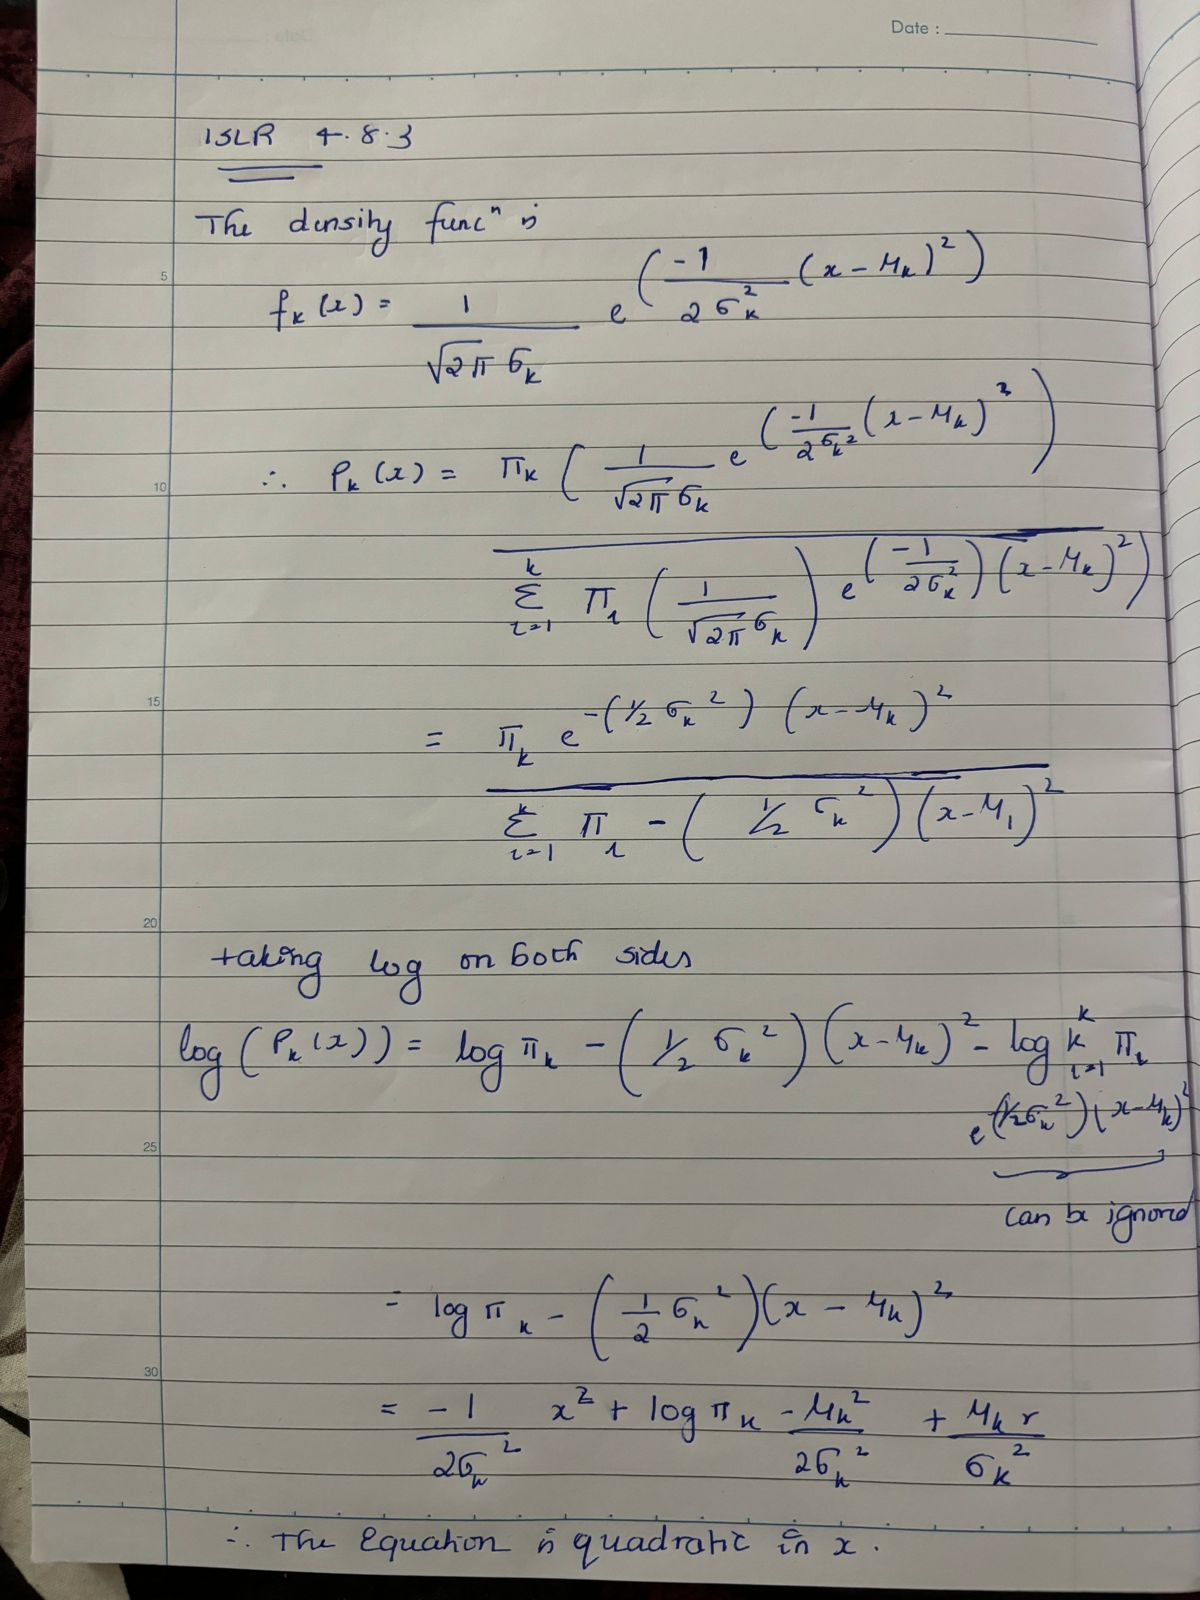

# ISLR 4.8.7

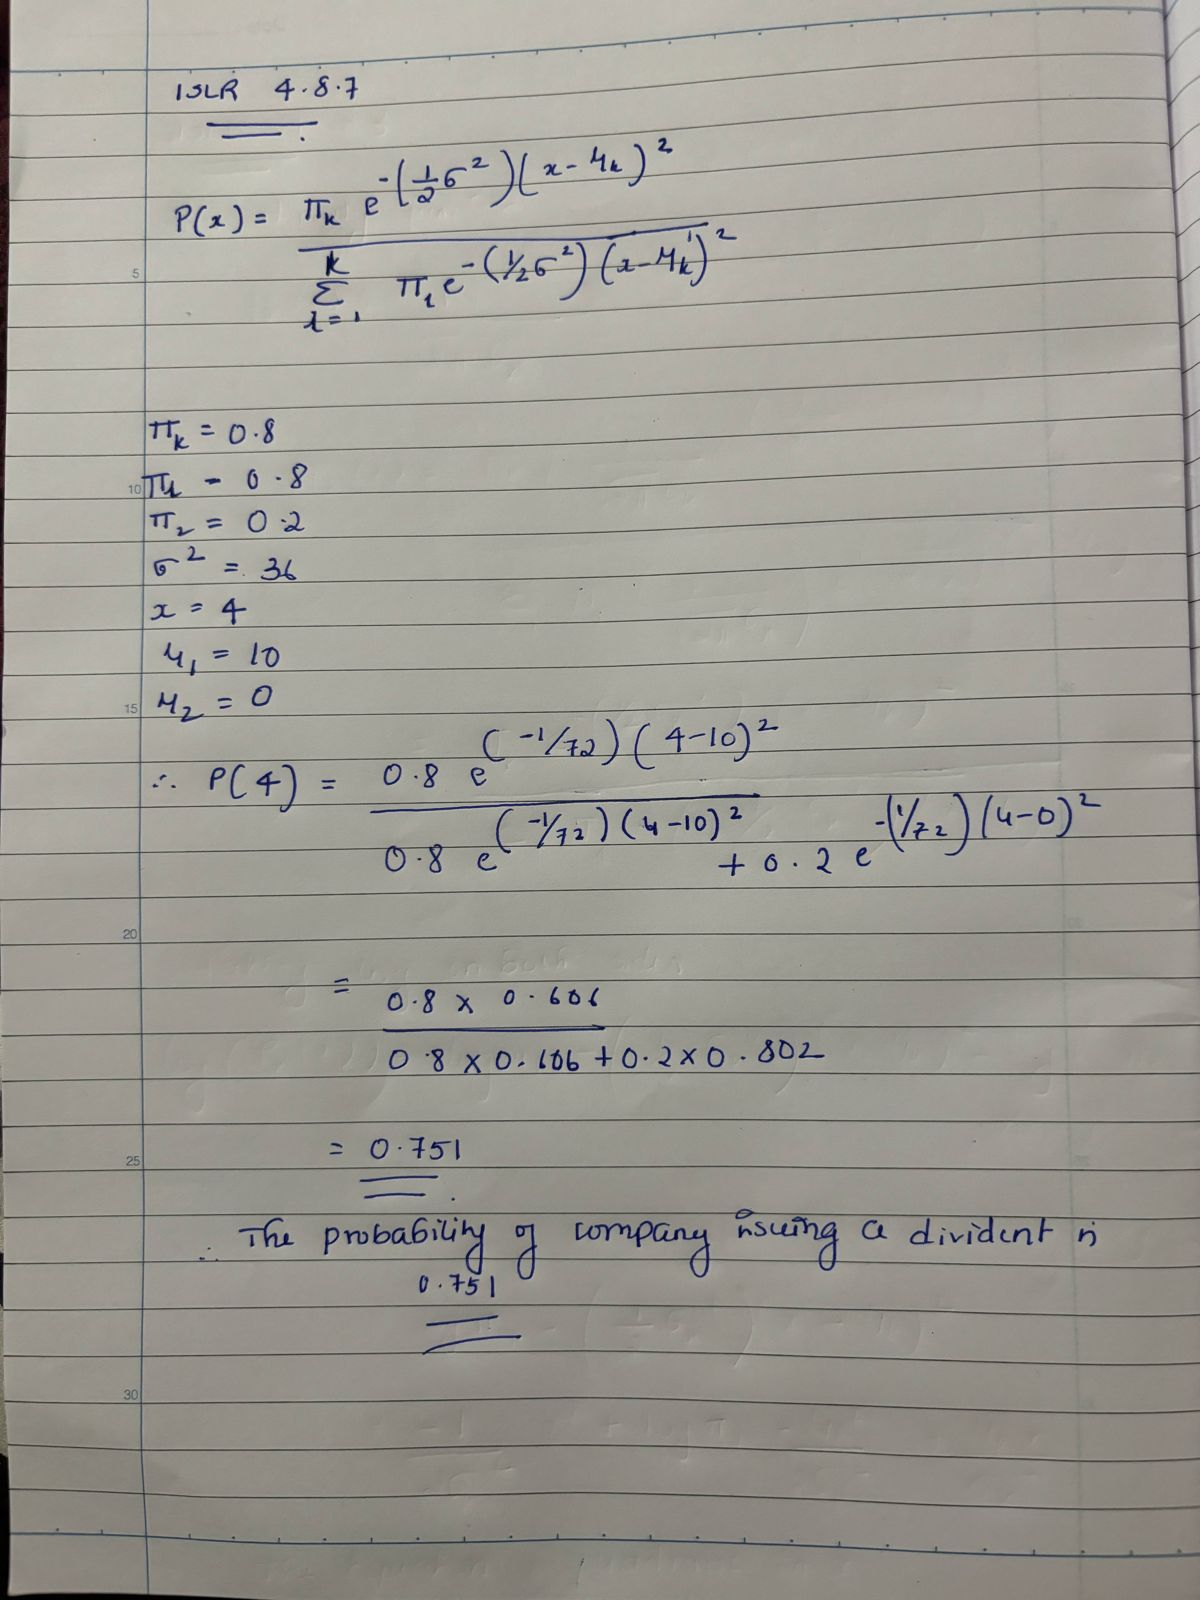

References
> OpenAI. (2024). ChatGPT (4) [Large language model]. https://chat.openai.com

> https://stackoverflow.com/questions/75573708/multiclass-classification-confusion-matrix

>https://www.w3schools.com/python/scipy/scipy_interpolation.php